# Additional features for scripts and applications

In this document we describe some features of the astromodels package which are useful for non-interactive environment such as scripts or applications

First let's import astromodels and let's load a model from a file, which we will use as example:

In [1]:
from astromodels import *

In [2]:
my_model = load_model("my_model.yml")

## Get dictionaries of point and extended sources

If you don't know the details (such as names) of the sources contained in the model, you can obtain dictionaries of point sources and extended sources like:

In [3]:
point_sources = my_model.point_sources
extended_sources = my_model.extended_sources

# Print the names of the point sources
print(point_sources.keys())

# Print the names of the extended sources
print(extended_sources.keys())

['source_1', 'source_2']
[]


You can use these dictionaries as usual. For example, you can loop over all point sources and print their position:

In [4]:
for source_name, point_source in point_sources.iteritems():
    
    print("The model contain point source %s at %s" % (source_name, point_source.position))

The model contain point source source_1 at Sky direction (R.A., Dec.) = (125.60000, -75.30000) (J2000)
The model contain point source source_2 at Sky direction (l, b) = (11.25000, -22.50000) (J2000)


## Accessing components and spectral shapes with no previous information

Similarly you can access components and their spectral shapes (i.e., functions) without knowing the names in advance. A dictionary containing the components of a given source can be obtained with: 

In [5]:
components = my_model.source_2.components
print(components.keys())

['synchrotron', 'IC']


So now we can loop over all the sources and print their components:

In [6]:
for source_name, point_source in my_model.point_sources.iteritems():
    
    print("Point source %s has components %s" % (source_name, point_source.components.keys()))

Point source source_1 has components ['main']
Point source source_2 has components ['synchrotron', 'IC']


With a fully-qualified path, you would need to know the name of the function to access its parameters. Instead, you can use the generic name "shape". For example these two statements point to the same function instance:

In [7]:
my_model.source_1.spectrum.main.powerlaw == my_model.source_1.spectrum.main.shape

True

Once you have a function instance, you can obtain a dictionary of its parameters as:

In [8]:
parameters = my_model.source_1.spectrum.main.powerlaw.parameters
print(parameters.keys())

['logK', 'piv', 'index']


Putting it all together, let's loop over all sources in our model, then over each component in each source, then over each parameter in each component:

In [9]:
for source_name, point_source in my_model.point_sources.iteritems():
    
    print("Found source %s" % source_name)
    
    print("  Position of point source: %s" % point_source.position)
    
    for component_name, component in point_source.components.iteritems():
        
        print("    Found component %s" % component_name)
        
        for parameter_name, parameter in component.shape.parameters.iteritems():
            
            print("      Found parameter %s" % parameter_name)

Found source source_1
  Position of point source: Sky direction (R.A., Dec.) = (125.60000, -75.30000) (J2000)
    Found component main
      Found parameter logK
      Found parameter piv
      Found parameter index
Found source source_2
  Position of point source: Sky direction (l, b) = (11.25000, -22.50000) (J2000)
    Found component synchrotron
      Found parameter logK
      Found parameter piv
      Found parameter index
    Found component IC
      Found parameter logK
      Found parameter piv
      Found parameter index


Let's now plot the differential flux between 1 and 100 keV of all components from all sources:

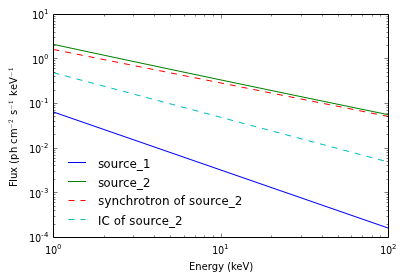

In [10]:
import matplotlib.pyplot as plt

# Comment this out if you are not using the IPython notebook
%matplotlib inline

# Prepare 100 energies logarithmicall spaced between 1 and 100 keV
energies = np.logspace(0,2,100)

# Now loop over all point sources and plot them
for source_name, point_source in my_model.point_sources.iteritems():
    
    # Plot the sum of all components for this source
    
    plt.loglog(energies, point_source(energies),label=source_name)
    
    # If there is more than one component, plot them also separately
    
    if len(point_source.components) > 1:
    
        for component_name, component in point_source.components.iteritems():
        
            plt.loglog(energies,component.shape(energies),'--',label="%s of %s" %(component_name, source_name))

# Add a legend
plt.legend(loc=0,frameon=False)

_ = plt.xlabel("Energy (keV)")
_ = plt.ylabel(r"Flux (ph cm$^{-2}$ s$^{-1}$ keV$^{-1}$")

## Getting the path of an element and using it programmatically

Whenever you have an element from the model, you can get its fully-qualified path by using the .path property. This for example will print the path of all the parameters in the model:

In [11]:
for source_name, point_source in my_model.point_sources.iteritems():
    
    for component_name, component in point_source.components.iteritems():
        
        for parameter_name, parameter in component.shape.parameters.iteritems():
            
            print(parameter.path)

source_1.spectrum.main.powerlaw.logK
source_1.spectrum.main.powerlaw.piv
source_1.spectrum.main.powerlaw.index
source_2.spectrum.synchrotron.powerlaw.logK
source_2.spectrum.synchrotron.powerlaw.piv
source_2.spectrum.synchrotron.powerlaw.index
source_2.spectrum.IC.powerlaw.logK
source_2.spectrum.IC.powerlaw.piv
source_2.spectrum.IC.powerlaw.index


If you have a path of an element in a string, you can use it to access the element by using the [] operator of the Model class like this:

In [12]:
my_path = 'source_2.spectrum.IC.powerlaw.logK'

logK = my_model[my_path]

print(logK)

Parameter logK = -0.32
(min_value = -40, max_value = 40, delta = 0.1, free = True)


## Alternative way of accessing the information in the model

We present here an alternative way to get information from the model without using dictionaries, and using instead source IDs. A source ID is just an ordinal number, separate for point sources and extended sources. Hence, the first point source has ID 0, the second point source has ID 1, and so on. Similarly, the first extended source has ID 0, the second has ID 1 and so on:

In [13]:
# Get the number of point sources and of extended sources

n_pts = my_model.get_number_of_point_sources()
n_ext = my_model.get_number_of_extended_sources()

# Get the name of the first point source

print("The first point source is called %s" % my_model.get_point_source_name(0))
print("The second point source is called %s" % my_model.get_point_source_name(1))

# Of course you can achieve the same in a loop

for id in range(n_pts):
    
    print("Point source ID %s has name %s" % (id, my_model.get_point_source_name(id)))

The first point source is called source_1
The second point source is called source_2
Point source ID 0 has name source_1
Point source ID 1 has name source_2


Once you have the ID of a source, you can obtain information about it with these methods of the Model class:

In [14]:
src_id = 1

src_name = my_model.get_point_source_name(src_id)

ra, dec = my_model.get_point_source_position(src_id) # This will always return ra,dec

# Prepare 100 energies logarithmically spaced between 1 and 100 keV
energies = np.logspace(0,2,100)

differential_flux = my_model.get_point_source_fluxes(src_id, energies)

# Similar methods exist for extended sources (to be completed)

Depending on your application you might find these methods more convenient that interrogating the sources directly. Note however that some features are not available through this interface. For example, it is not possible to get information about different components through these methods.